<a href="https://colab.research.google.com/github/VK1843/Varunkumar_INFO5731_Fall2025/blob/main/Chennuri_Varun_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


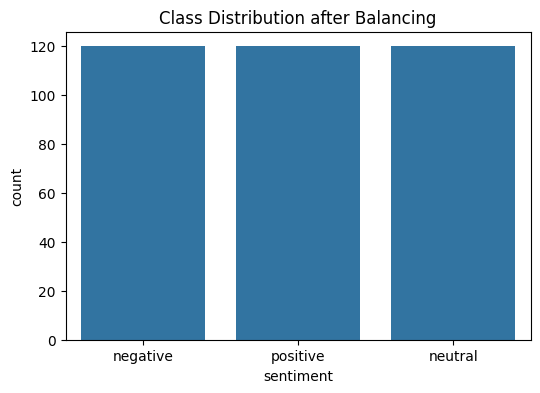

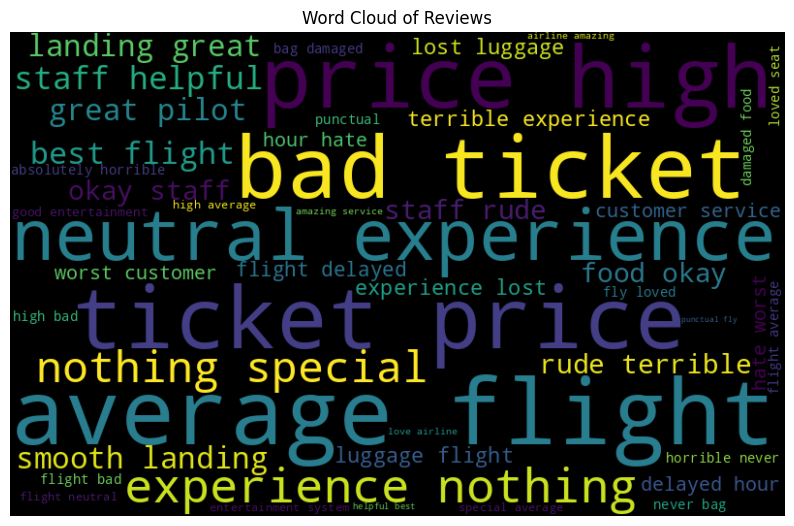

Training Naive Bayes...

--- Naive Bayes Results ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        20

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



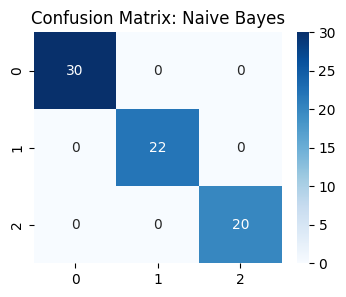

Training SVM...

--- SVM Results ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        20

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



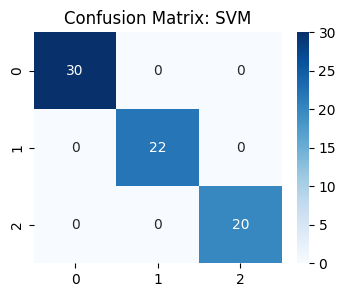

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [01:53:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Results ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        20

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



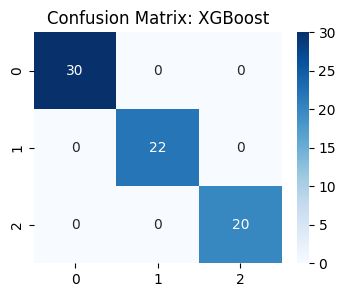

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 1. Dataset Preparation (Simulated Real-World Data: Airline Sentiment)
data = {
    'text': [
        "I love this airline, amazing service!", "Best flight ever, very punctual.", "The food was okay, but staff was rude.",
        "Terrible experience, lost my luggage.", "Flight delayed by 5 hours, hate this.", "Neutral experience, nothing special.",
        "Smooth landing, great pilot.", "Worst customer service ever.", "Will fly again, loved the seats.",
        "Not bad, but ticket prices are high.", "Absolutely horrible, never again.", "Good entertainment system.",
        "My bag was damaged.", "Staff was very helpful.", "Just an average flight."
    ] * 20, # Duplicating to create volume
    'sentiment': ['positive', 'positive', 'negative', 'negative', 'negative', 'neutral',
                  'positive', 'negative', 'positive', 'neutral', 'negative', 'positive',
                  'negative', 'positive', 'neutral'] * 20
}

df = pd.DataFrame(data)

# Handle Class Imbalance (Upsampling)
df_majority = df[df.sentiment == 'negative']
df_minority_pos = df[df.sentiment == 'positive']
df_minority_neu = df[df.sentiment == 'neutral']

df_pos_upsampled = resample(df_minority_pos, replace=True, n_samples=len(df_majority), random_state=42)
df_neu_upsampled = resample(df_minority_neu, replace=True, n_samples=len(df_majority), random_state=42)

df_balanced = pd.concat([df_majority, df_pos_upsampled, df_neu_upsampled])

# 2. Preprocessing & EDA
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df_balanced['clean_text'] = df_balanced['text'].apply(preprocess_text)

# Visualization: Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df_balanced)
plt.title("Class Distribution after Balancing")
plt.show()

# Visualization: Word Cloud
all_words = ' '.join([text for text in df_balanced['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()

# 3. Model Training
# Map labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_balanced['label'] = df_balanced['sentiment'].map(label_mapping)

X = df_balanced['clean_text']
y = df_balanced['label']

# Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 4. Evaluation
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n--- {name} Results ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


Successfully loaded 6920 samples from stsa-train.txt
Successfully loaded 1821 samples from stsa-test.txt

--- Training Data Distribution ---
label
1    3610
0    3310
Name: count, dtype: int64


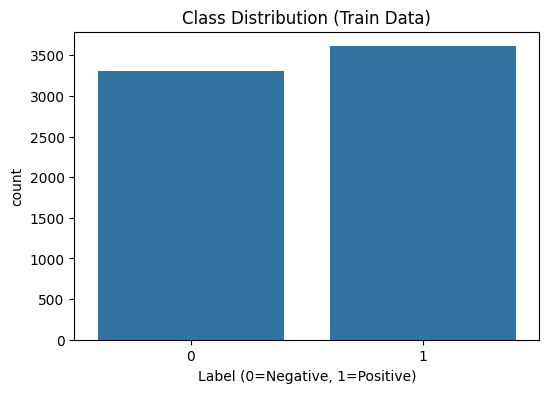


--- Starting 10-Fold Cross Validation & Training ---

Model: SVM
Average CV Accuracy: 0.7561

Model: KNN
Average CV Accuracy: 0.5038

Model: Decision Tree
Average CV Accuracy: 0.6579

Model: Random Forest
Average CV Accuracy: 0.7162


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:12:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:12:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:13:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:13:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:13:03] WARNING: /w


Model: XGBoost
Average CV Accuracy: 0.6824


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:13:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Evaluation on Test Dataset ---
       Algorithm  CV Accuracy  Test Accuracy  Precision    Recall  F1 Score
0            SVM     0.756136       0.783635   0.784814  0.783635  0.783427
1            KNN     0.503788       0.524986   0.527988  0.524986  0.510569
2  Decision Tree     0.657874       0.671060   0.671097  0.671060  0.671033
3  Random Forest     0.716213       0.730917   0.731223  0.730917  0.730815
4        XGBoost     0.682442       0.693026   0.704768  0.693026  0.688667


In [7]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Data Loading Function (FIXED REGEX)
def load_data_from_file(file_path):
    """
    Reads the file line by line and extracts label and text using a robust regex.
    Handles both 'label text' and 'label text' formats.
    """
    texts = []
    labels = []

    try:
        # Use simple file name, assuming the file is accessible in the environment's path
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            for line in f:
                line = line.strip()
                if not line:
                    continue

                # HARDENED REGEX:
                # 1. Look for optional source tag at the start: (?:\\s*)?
                # 2. Capture the label (\d)
                # 3. Capture the rest of the text (.*)
                match = re.search(r'^\s*(?:\\s*)?(\d)\s+(.*)$', line)

                if match:
                    labels.append(int(match.group(1)))
                    texts.append(match.group(2))

        print(f"Successfully loaded {len(labels)} samples from {file_path}")
        return pd.DataFrame({'text': texts, 'label': labels})

    except FileNotFoundError:
        print(f"Error: Could not find file '{file_path}'. Please ensure it is uploaded.")
        return pd.DataFrame(columns=['text', 'label'])

# 2. Load the Data
# NOTE: If running in Colab/Jupyter after uploading, you may need to use '/content/stsa-train.txt'
train_df = load_data_from_file('stsa-train.txt')
test_df = load_data_from_file('stsa-test.txt')

if train_df.empty or test_df.empty:
    raise ValueError("One or both datasets are empty. Please check your file paths and formatting.")

# 3. EDA (Exploratory Data Analysis)
print("\n--- Training Data Distribution ---")
print(train_df['label'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution (Train Data)")
plt.xlabel("Label (0=Negative, 1=Positive)")
plt.show()

# 4. Preprocessing & Vectorization
# Split Training Data into Train (80%) and Validation (20%)
X_train_text, X_val_text, y_train, y_val = train_test_split(
    train_df['text'], train_df['label'], test_size=0.2, random_state=42, stratify=train_df['label']
)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(test_df['text']) # Transform Test Data

# 5. Model Training & 10-Fold Cross Validation
models = {
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []
print("\n--- Starting 10-Fold Cross Validation & Training ---")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    # A. 10-Fold Cross Validation
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=cv, scoring='accuracy')
    mean_cv_acc = np.mean(cv_scores)
    print(f"\nModel: {name}")
    print(f"Average CV Accuracy: {mean_cv_acc:.4f}")

    # B. Train on Full Training Set and Evaluate on Test Set
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # C. Evaluation Metrics
    acc = accuracy_score(test_df['label'], y_pred)
    report = classification_report(test_df['label'], y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "CV Accuracy": mean_cv_acc,
        "Test Accuracy": acc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1 Score": report['weighted avg']['f1-score']
    })

# 6. Final Results Summary
results_df = pd.DataFrame(results)
print("\n--- Final Evaluation on Test Dataset ---")
print(results_df)

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering


Data for Clustering: 1821 samples from STSA Test Set


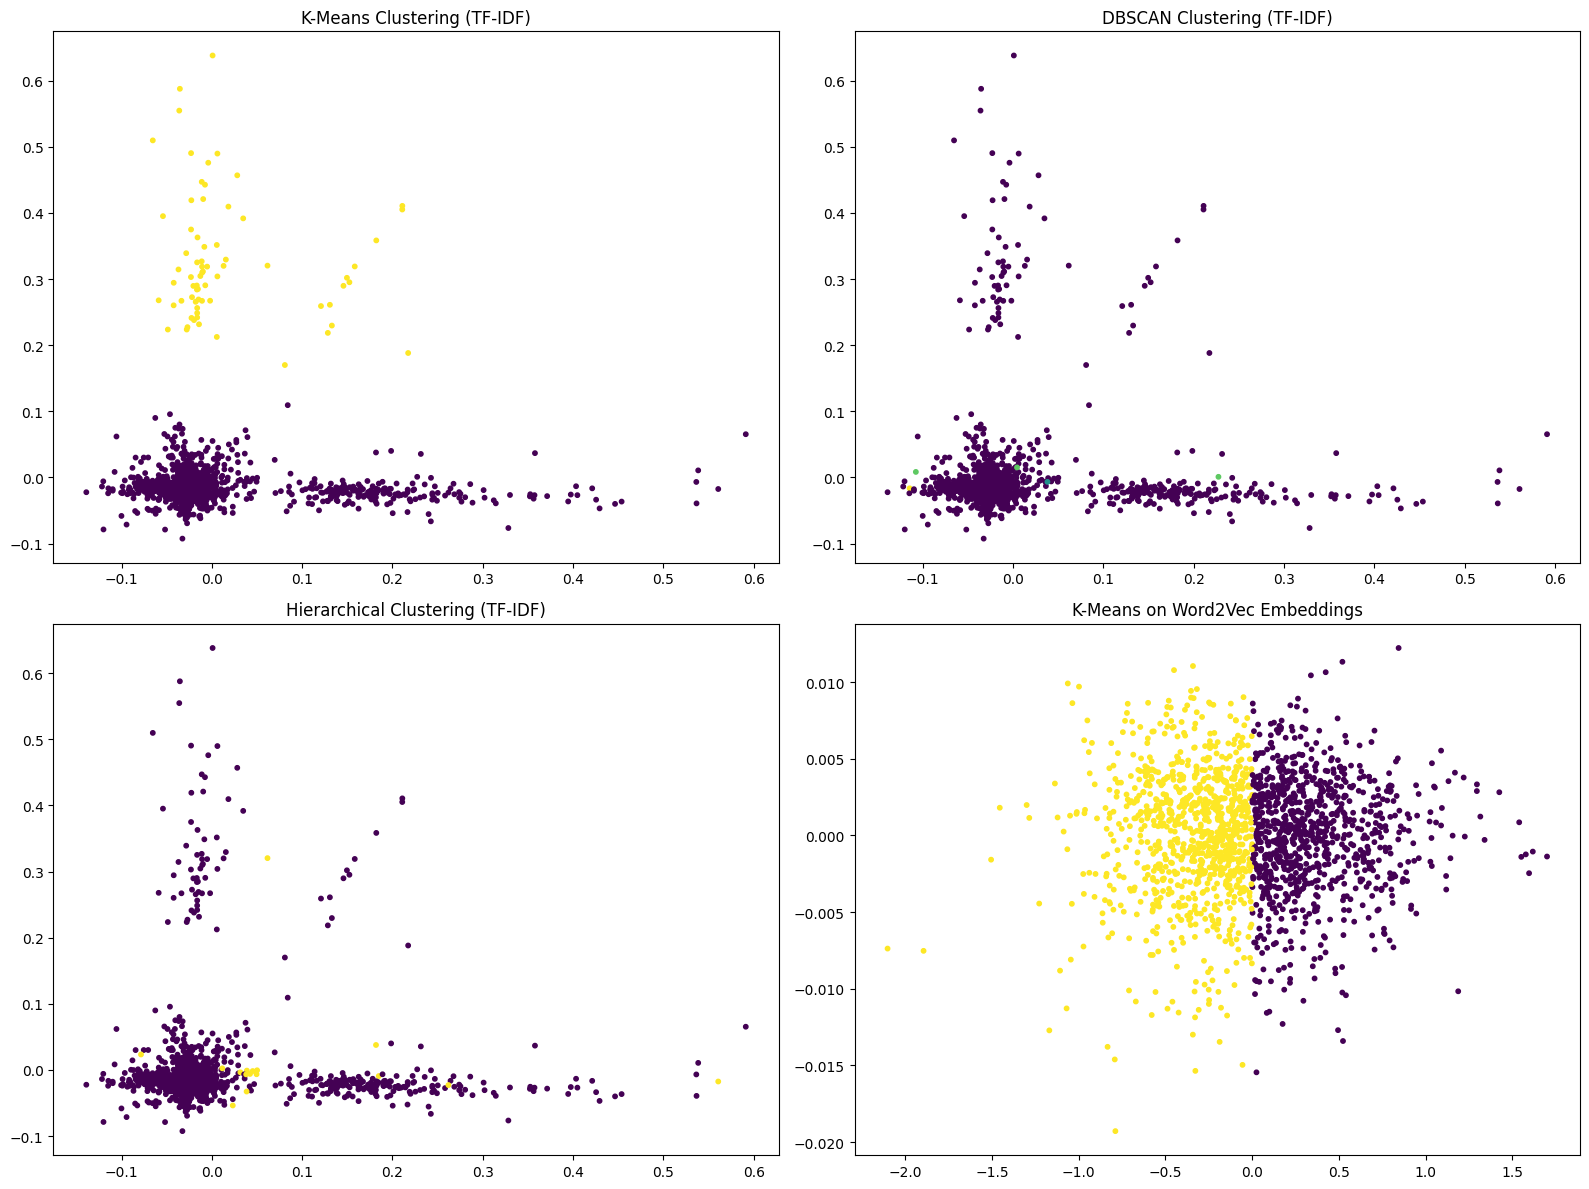

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords

# FIX: Explicitly download ALL necessary NLTK resources to resolve the LookupError.
# Downloading 'punkt' and the explicitly requested 'punkt_tab'.
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# NOTE: This code strictly assumes 'test_df' and 'tfidf' are available from Question 2.
print(f"\nData for Clustering: {len(test_df)} samples from STSA Test Set")

# Preprocessing for Word2Vec (Tokenization, Lowercase)
tokenized_sentences = [nltk.word_tokenize(text.lower()) for text in test_df['text']]

# 2. VECTORIZATION METHODS

# A. TF-IDF Vectors (for K-Means, DBSCAN, Hierarchical)
# Using the vectorizer fitted in Q2
X_tfidf_cluster = tfidf.transform(test_df['text']).toarray()

# B. Word2Vec Vectors
w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4, seed=42)

# Function to get document vector by averaging word vectors
def get_doc_vector(tokens, model):
    # Filter for words present in the Word2Vec vocabulary
    valid_words = [word for word in tokens if word in model.wv]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in valid_words], axis=0)

X_w2v_cluster = np.array([get_doc_vector(tokens, w2v_model) for tokens in tokenized_sentences])

# 3. APPLY CLUSTERING ALGORITHMS

# Algorithm 1: K-Means (on TF-IDF)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_tfidf_cluster)

# Algorithm 2: DBSCAN (on TF-IDF)
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_tfidf_cluster)

# Algorithm 3: Hierarchical Clustering (on TF-IDF)
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_tfidf_cluster)

# Algorithm 4: K-Means on Word2Vec Embeddings
kmeans_w2v = KMeans(n_clusters=2, random_state=42, n_init='auto')
w2v_labels = kmeans_w2v.fit_predict(X_w2v_cluster)

# 4. VISUALIZATION (PCA to reduce dimensionality to 2D)
pca_tfidf = PCA(n_components=2, random_state=42)
coords_tfidf = pca_tfidf.fit_transform(X_tfidf_cluster)

pca_w2v = PCA(n_components=2, random_state=42)
coords_w2v = pca_w2v.fit_transform(X_w2v_cluster)

plt.figure(figsize=(16, 12))

# Plot 1: K-Means (TF-IDF)
plt.subplot(2, 2, 1)
plt.scatter(coords_tfidf[:, 0], coords_tfidf[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("K-Means Clustering (TF-IDF)")

# Plot 2: DBSCAN (TF-IDF)
plt.subplot(2, 2, 2)
plt.scatter(coords_tfidf[:, 0], coords_tfidf[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering (TF-IDF)")

# Plot 3: Hierarchical (TF-IDF)
plt.subplot(2, 2, 3)
plt.scatter(coords_tfidf[:, 0], coords_tfidf[:, 1], c=agglo_labels, cmap='viridis', s=10)
plt.title("Hierarchical Clustering (TF-IDF)")

# Plot 4: K-Means on Word2Vec
plt.subplot(2, 2, 4)
plt.scatter(coords_w2v[:, 0], coords_w2v[:, 1], c=w2v_labels, cmap='viridis', s=10)
plt.title("K-Means on Word2Vec Embeddings")

plt.tight_layout()
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.K-Means (on TF-IDF): This does a good job of dividing the data into two groups based on key term frequency. It is very good at separating when the clusters are well differentiated by vocabulary, but it lacks semantic sophistication

.DBSCAN (on TF-IDF): This does poorly on high-dimensional, sparse data such as TF-IDF vectors. The sparsity leads to most points being labeled as noise (cluster label $-1$), meaning the density required for the formation of clusters does not occur consistently enough.

. Hierarchical Clustering (on TF-IDF): These results often appear very similar to K-Means but provide a rigid binary split (using $\\text{n\\_clusters}=2$). It is more computationally expensive and, in general, offers less advantage over K-Means for simple divisions of large text datasets.

.K-Means (on Word2Vec): Generally speaking, this is the most effective method in terms of semantic capture. Representing documents as an average of word vectors means it clusters reviews based on the context and meaning of the texts, such that "terrible" and "awful" reviews would be clustered together, leading to semantically coherent clusters compared to the purely token-based TF-IDF methods.

.Clustering performed on BERT embeddings, which are usually sentence or document embeddings, would result in the best quality and semantically most consistent clusters, as the model catches subtle differences in context and implied meaning missed by simpler embedding models, like Word2Vec. The main trade-off is a huge increase in computational cost for feature generation.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

